In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("energydata_complete.csv").drop('date', axis=1)

In [4]:
print(df.shape)
df.head(5)

(19735, 28)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
list(df.columns)

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

### __Target__
#### The target variable is Y "Appliances", this is the value of appliance energy to every appliances in the house every 10 minutes. Next step is looking for the best X variables to predict the Y variable.

In [6]:
df = df.rename(columns={
    'T1': 'T_Kitchen',
    'RH_1': 'H_Kitchen',
    'T2': 'T_LivingRoom',
    'RH_2': 'H_LivingRoom',
    'T3': 'T_Laundry',
    'RH_3': 'H_Laundry',
    'T4': 'T_Office',
    'RH_4': 'H_Office',
    'T5': 'T_Bathroom',
    'RH_5': 'H_Bathroom',
    'T6': 'T_NorthSide',
    'RH_6': 'H_NorthSide',
    'T7': 'T_Ironing',
    'RH_7': 'H_Ironing',
    'T8': 'T_TeenagerRoom',
    'RH_8': 'H_TeenagerRoom',
    'T9': 'T_ParentsRoom',
    'RH_9': 'H_ParentsRoom',
    'Press_mm_hg': 'Pressure',
    'RH_out': 'H_out'
})

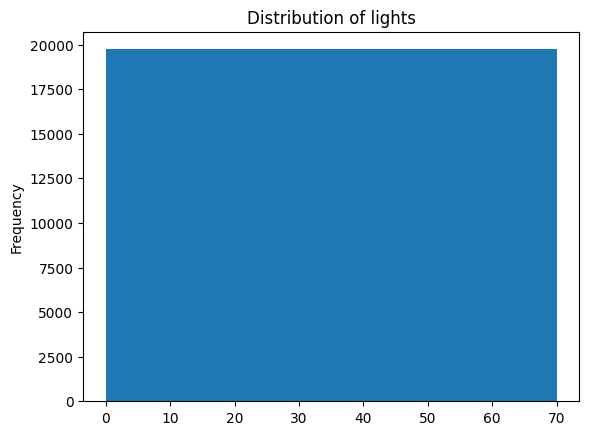

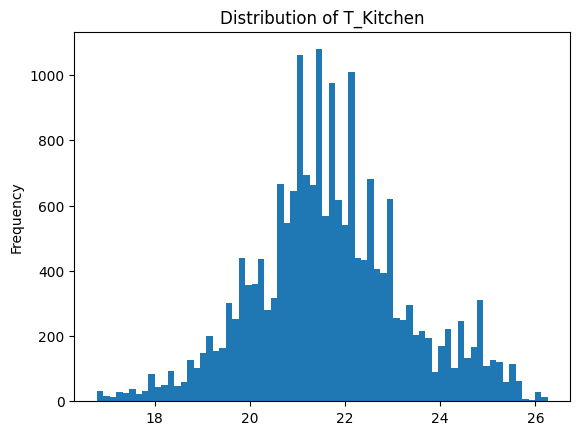

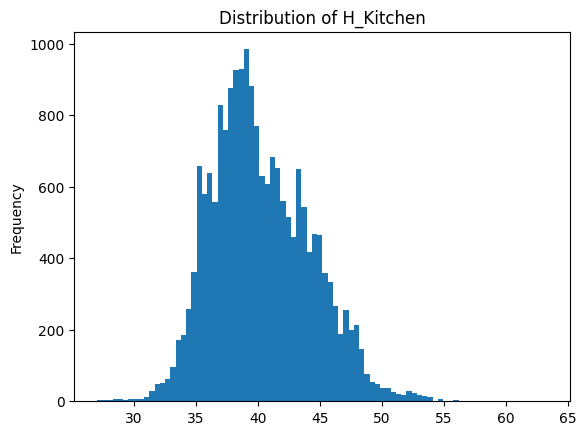

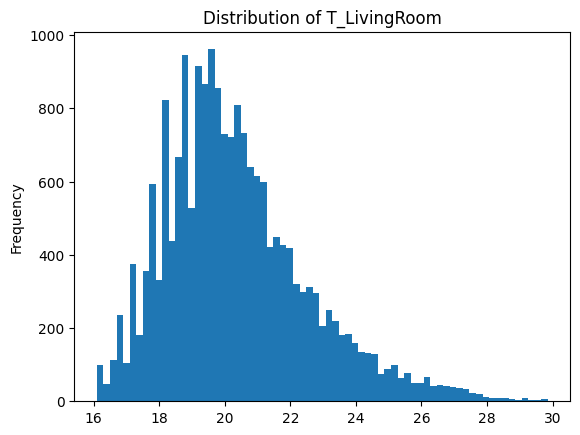

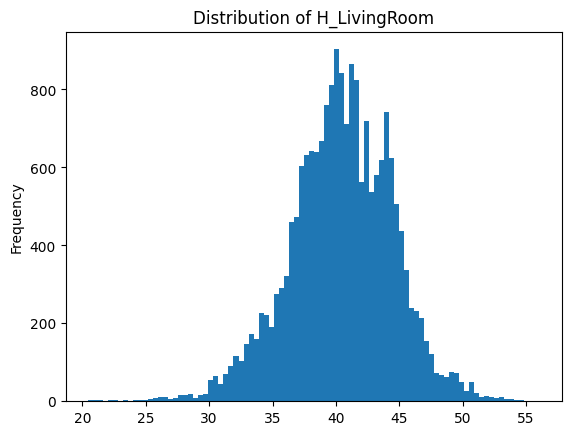

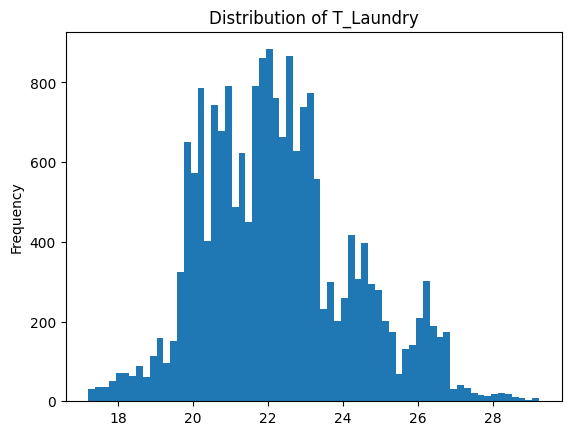

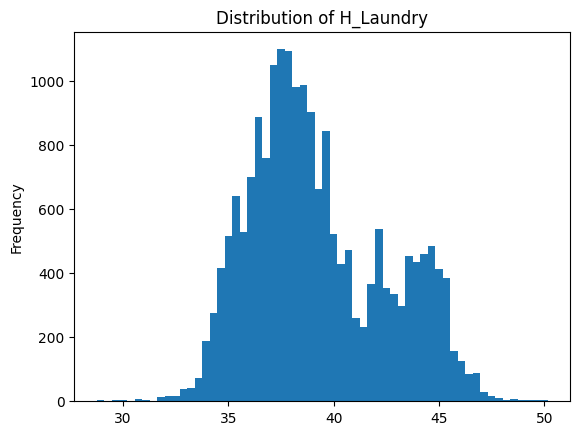

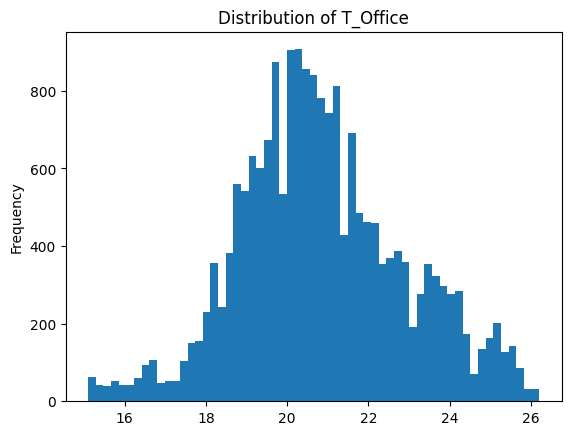

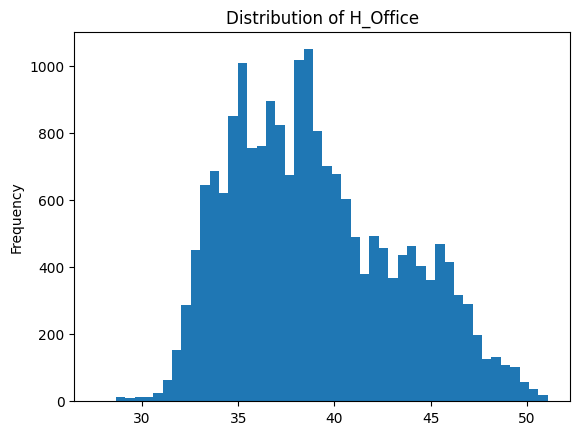

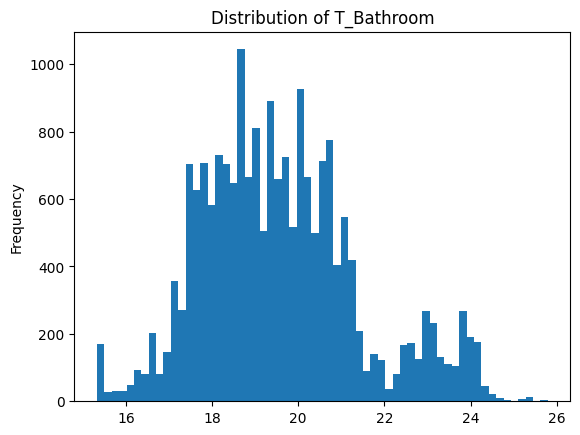

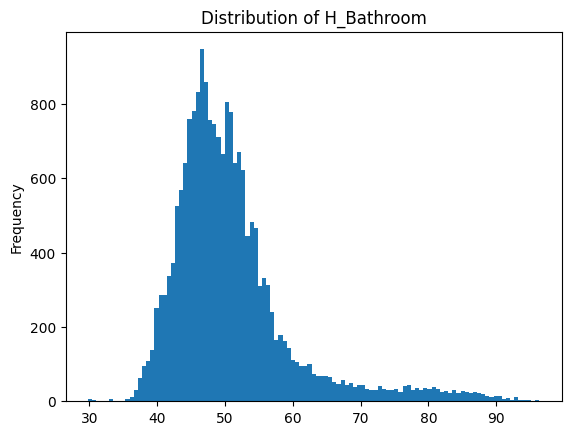

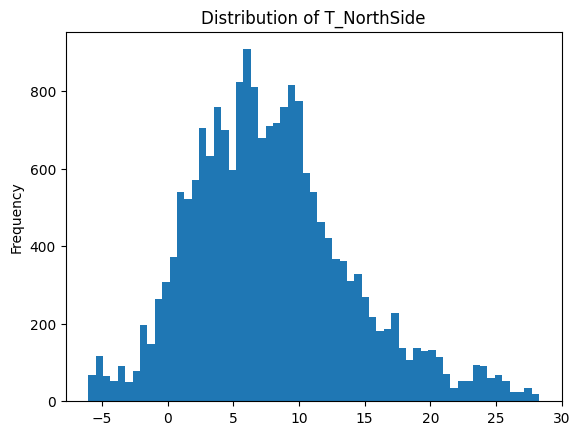

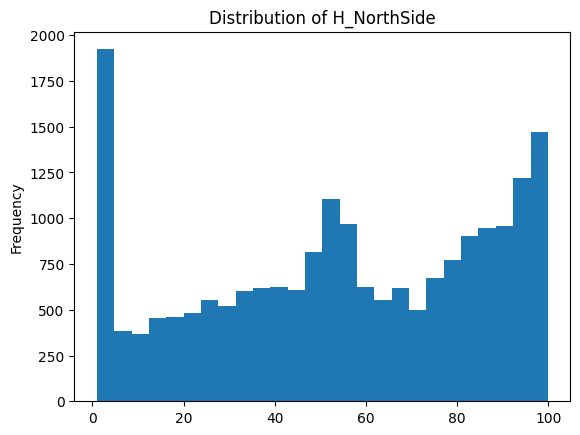

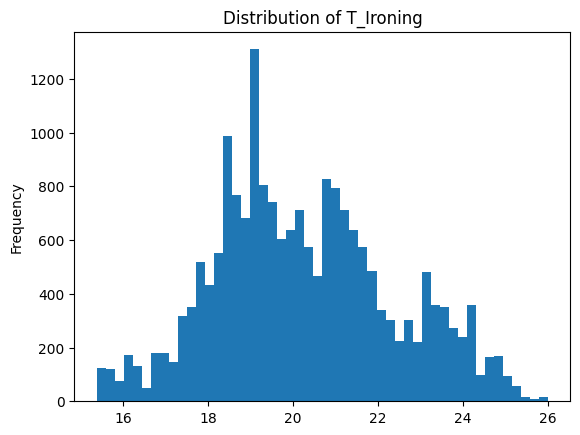

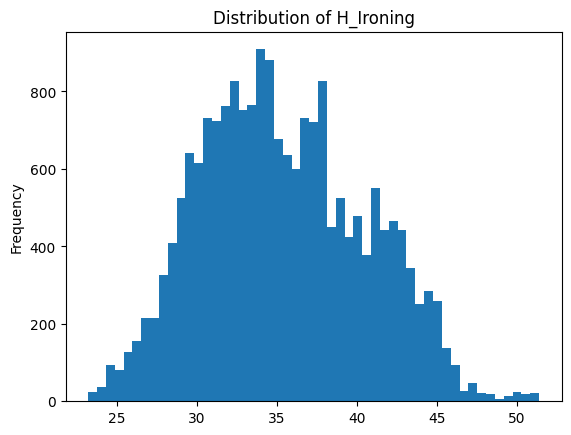

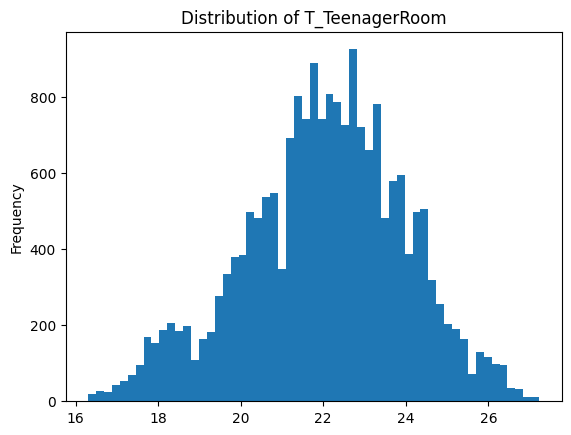

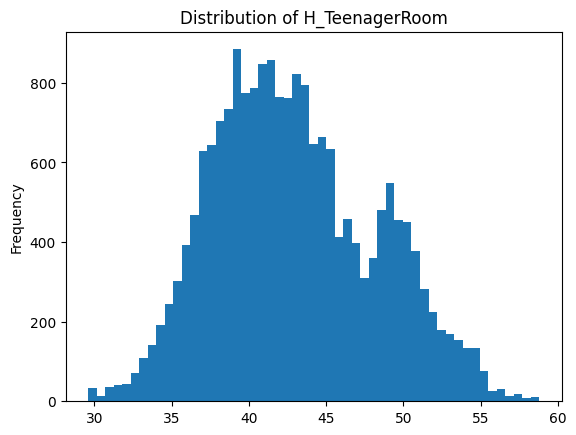

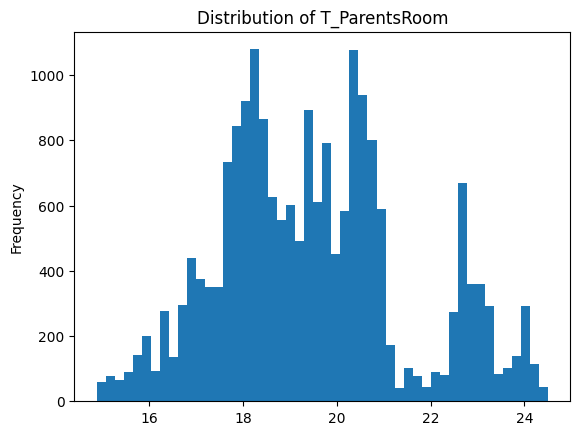

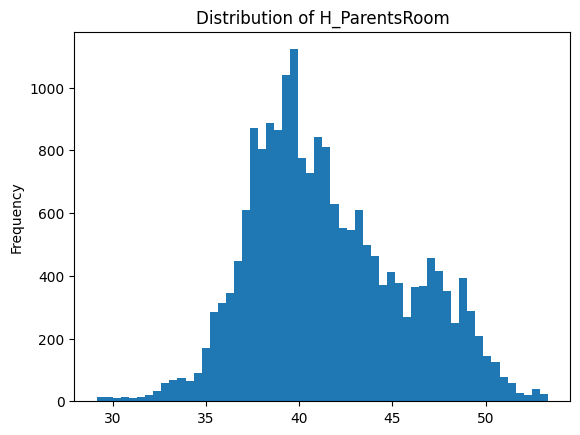

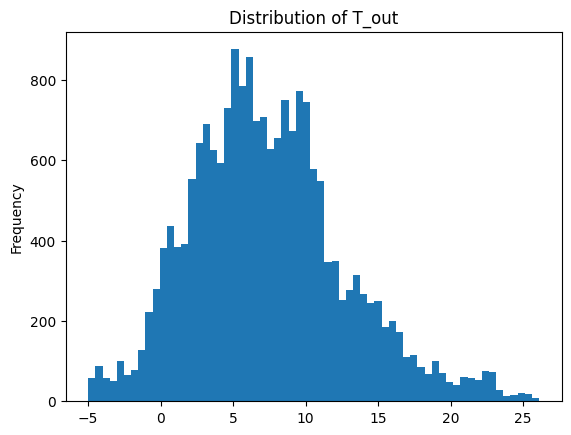

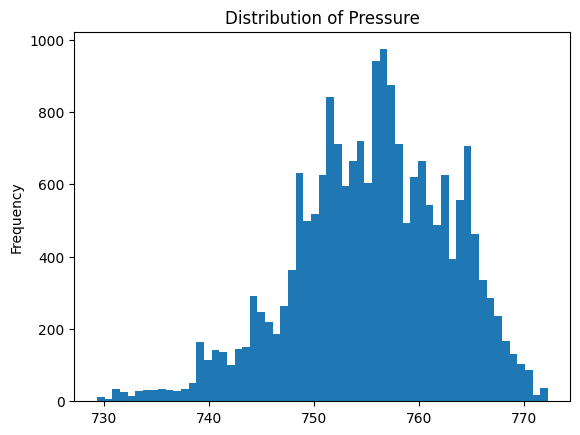

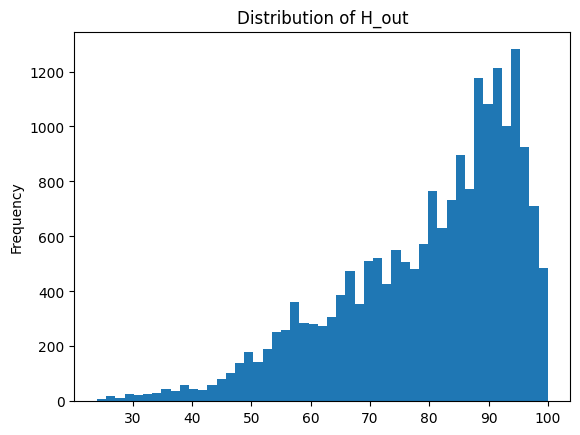

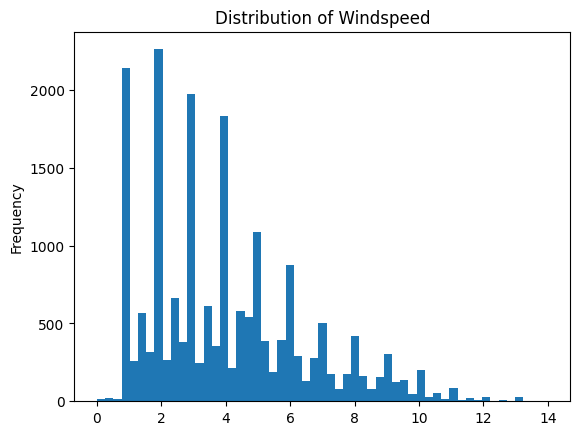

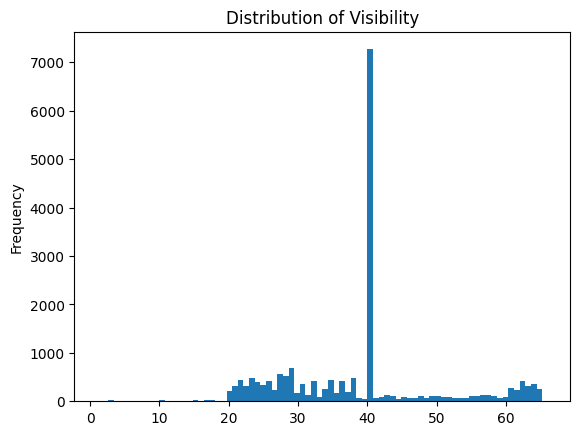

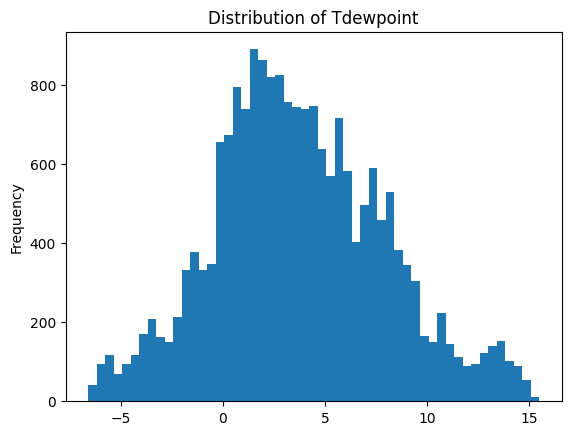

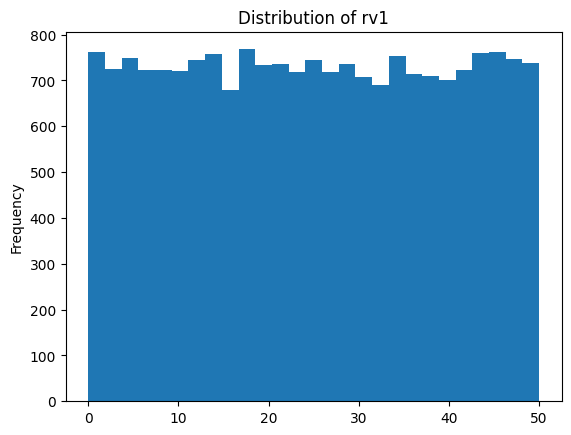

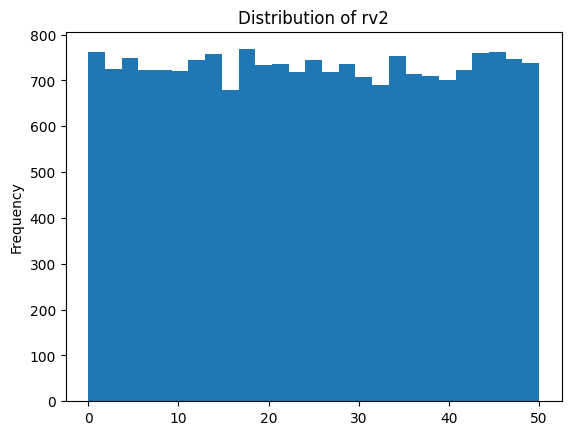

In [7]:
for label in df.columns[1:]:
    plt.figure()
    plt.hist(df[label], bins='fd')
    plt.title(f"Distribution of {label}")
    plt.ylabel("Frequency")
    plt.show()

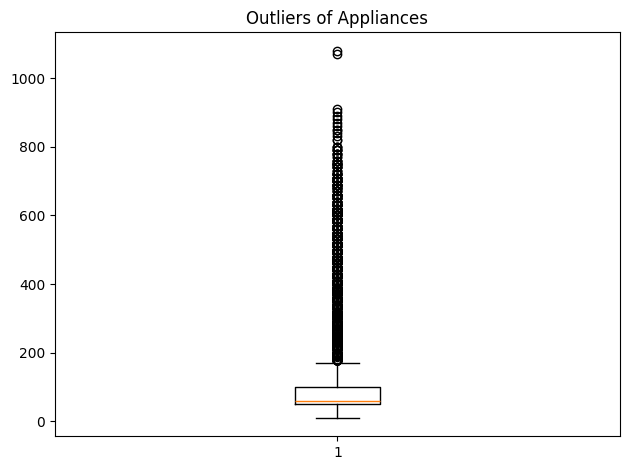

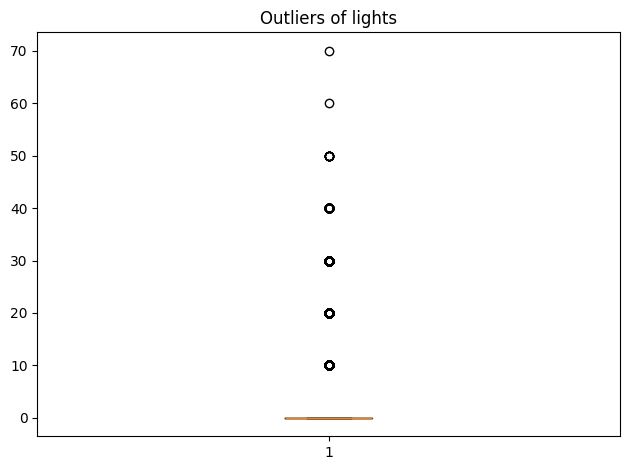

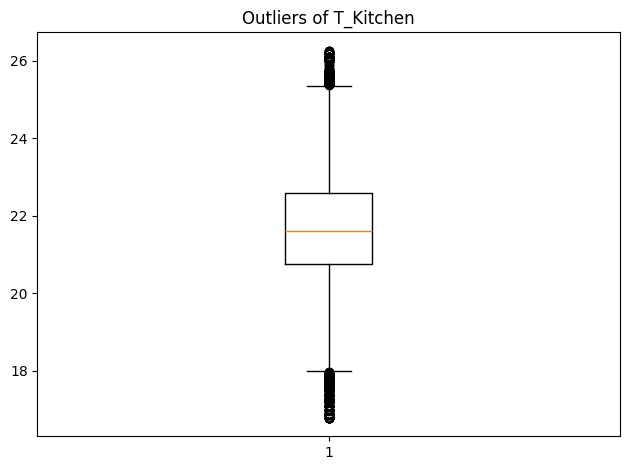

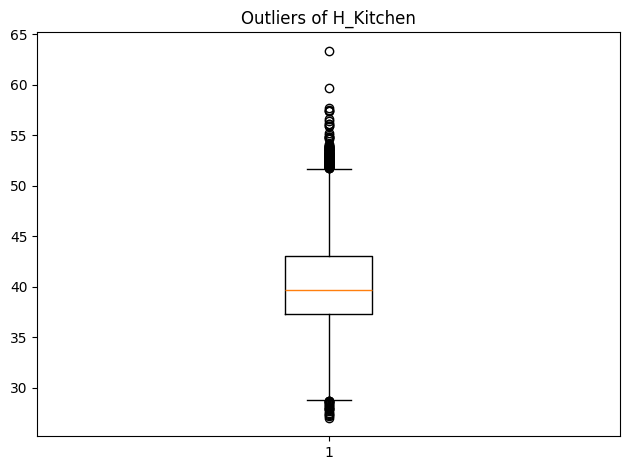

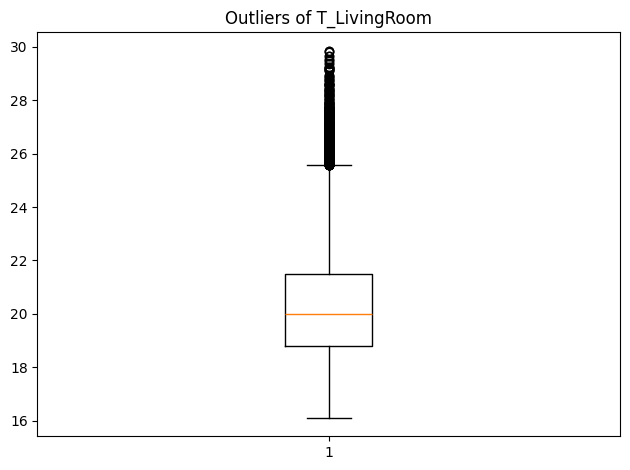

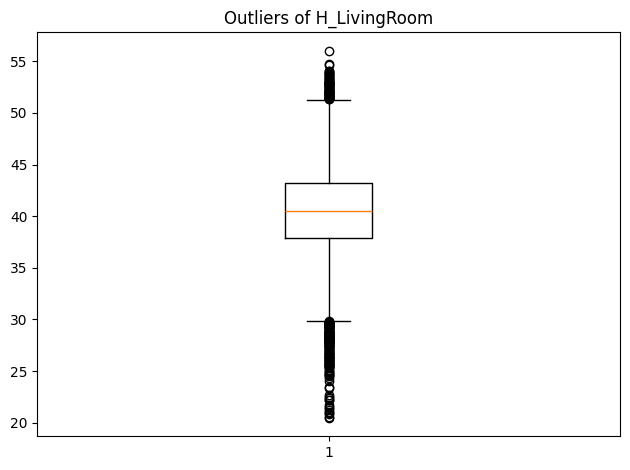

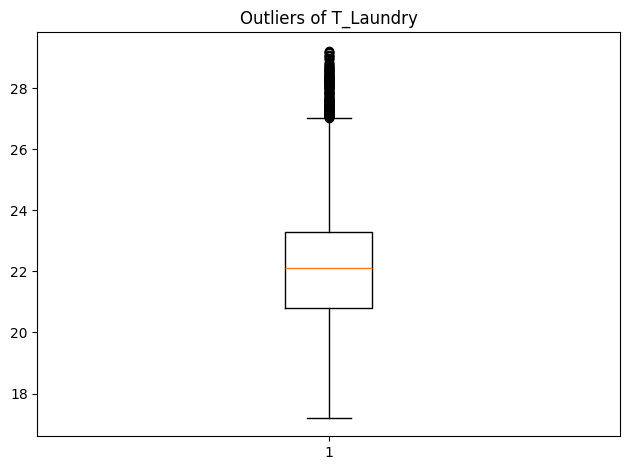

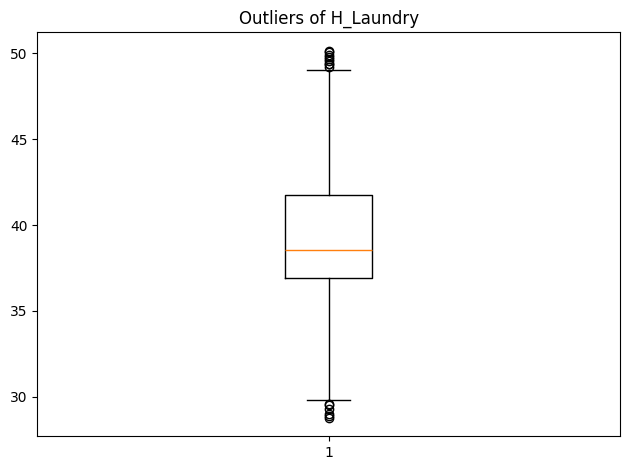

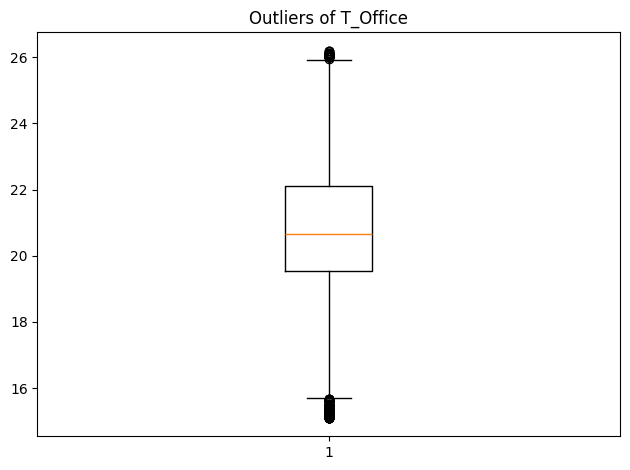

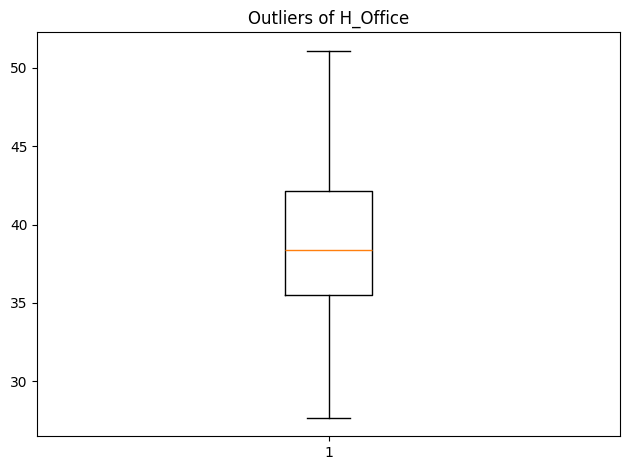

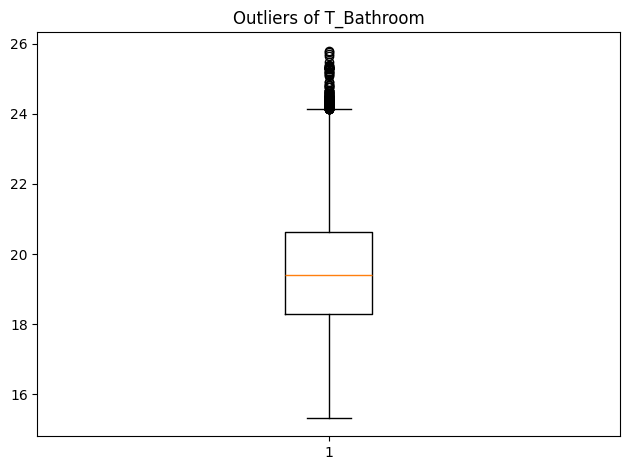

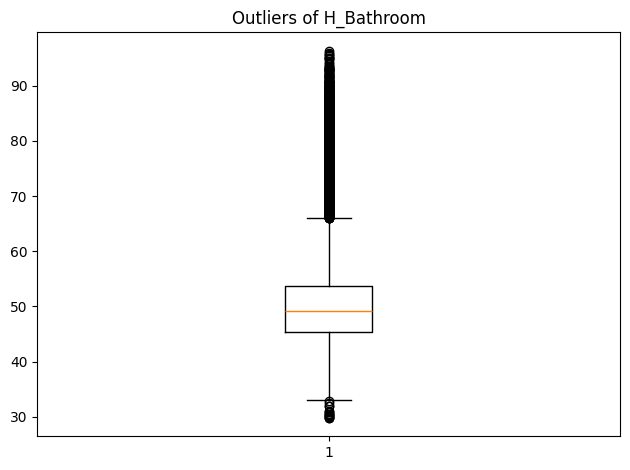

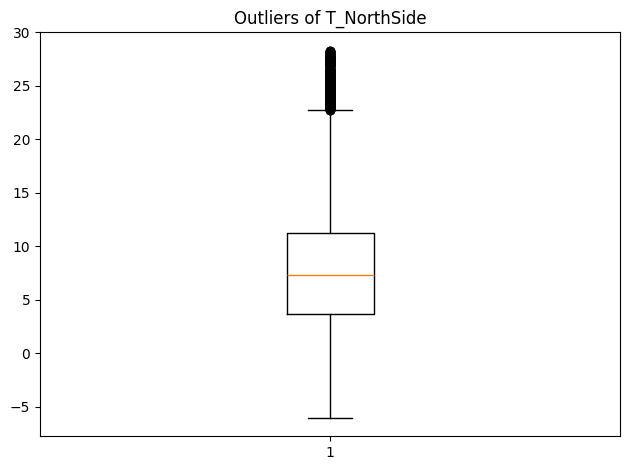

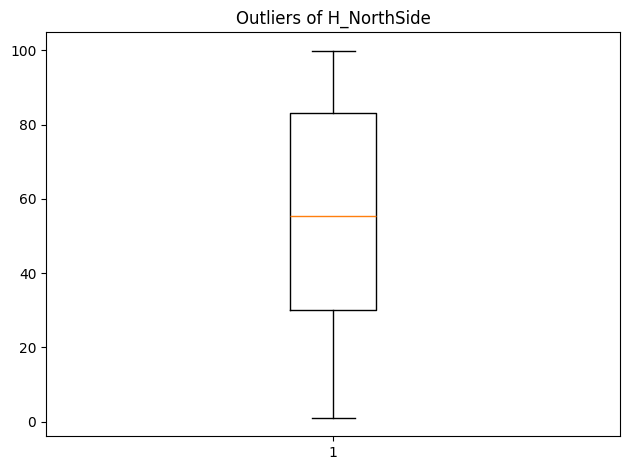

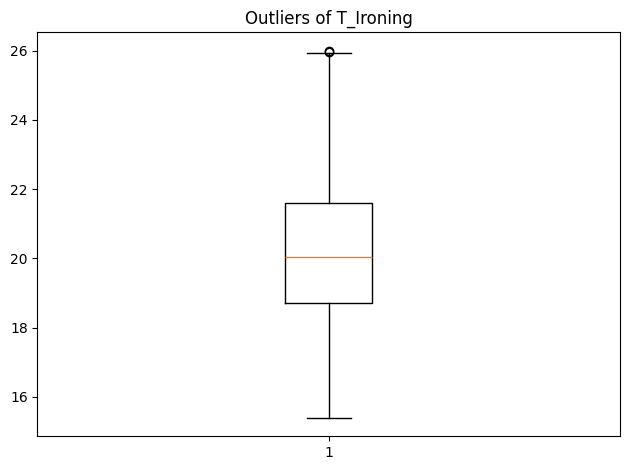

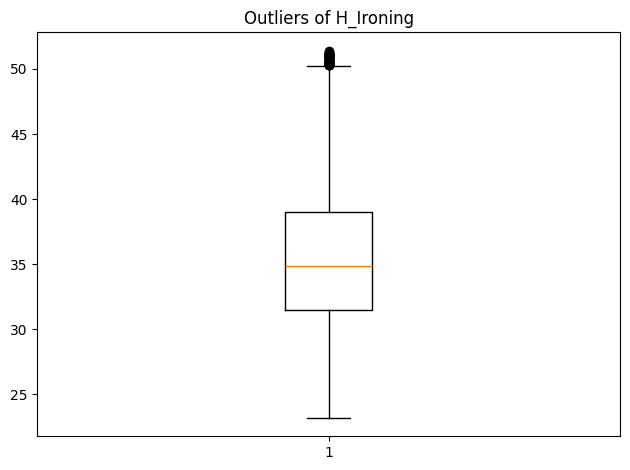

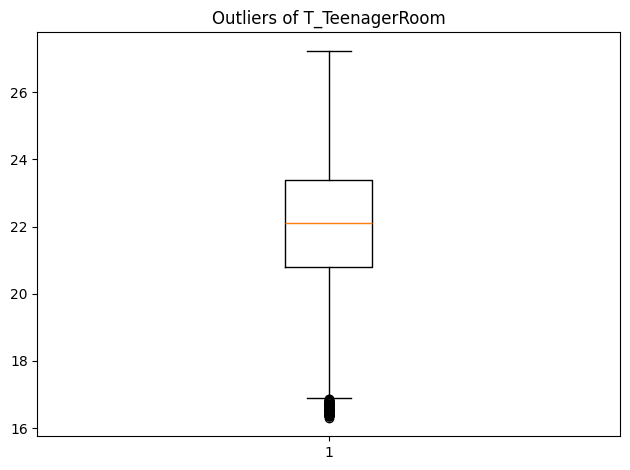

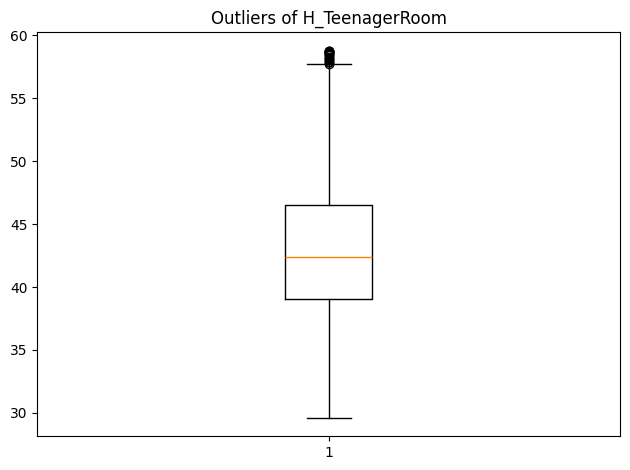

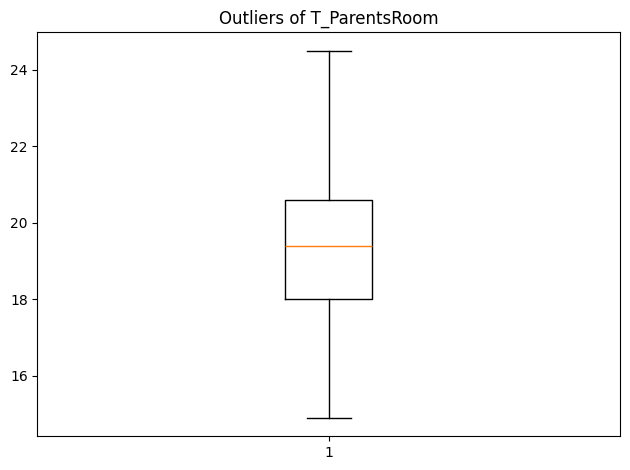

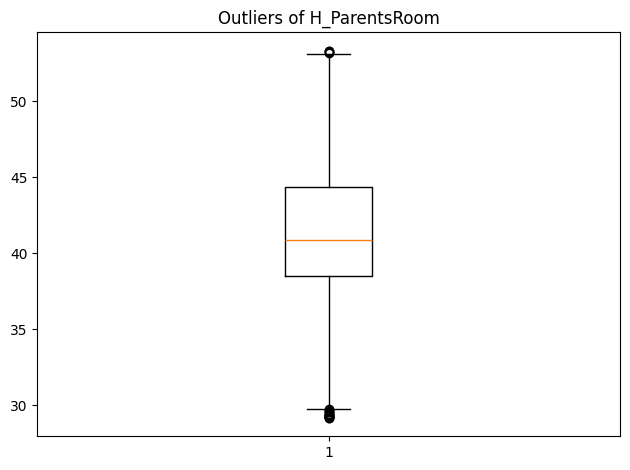

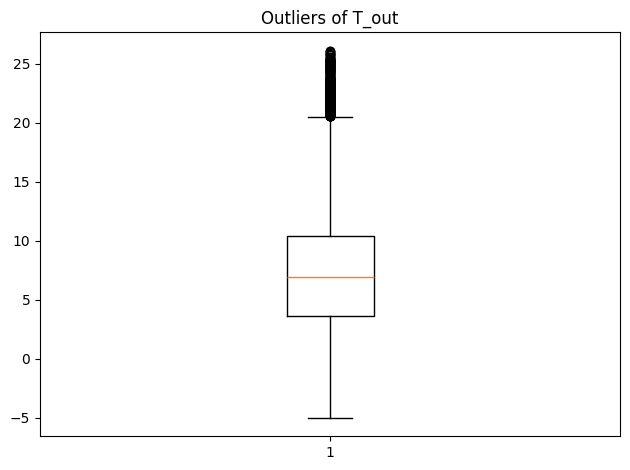

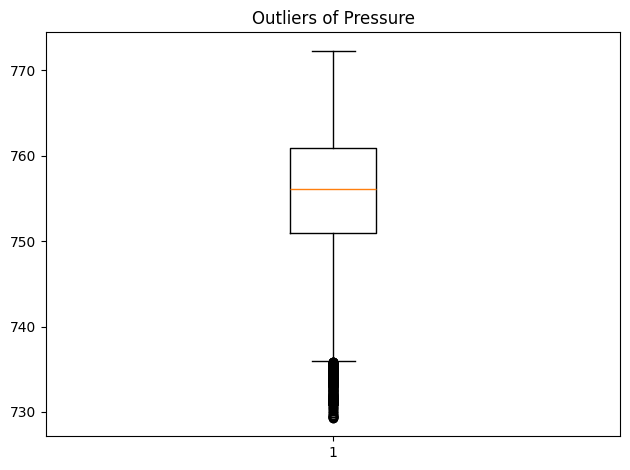

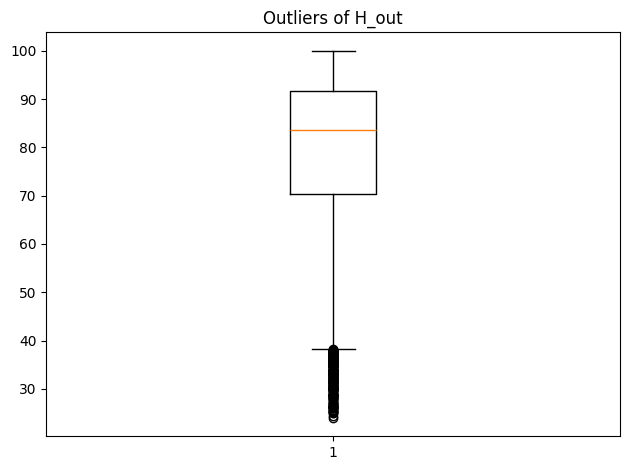

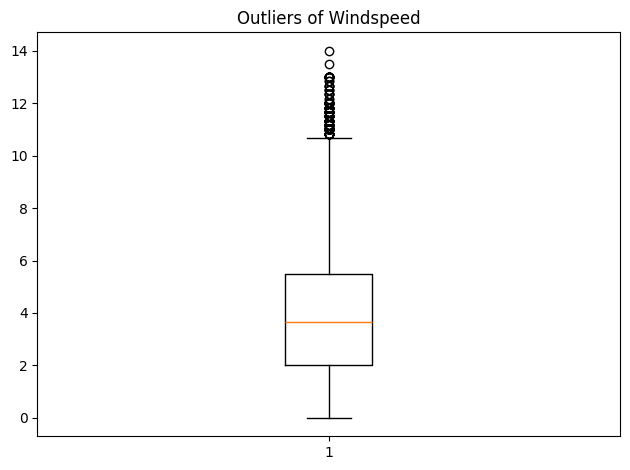

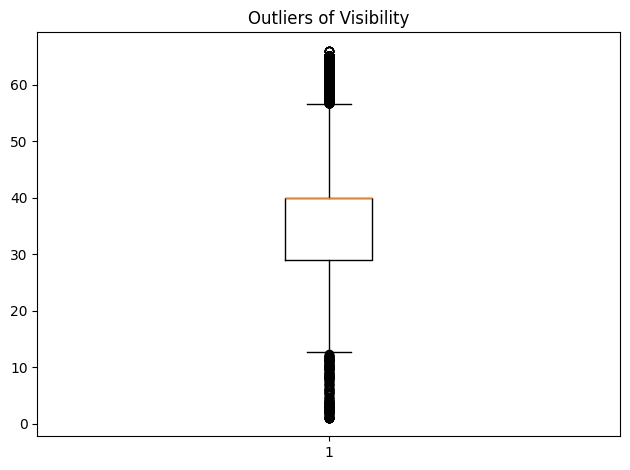

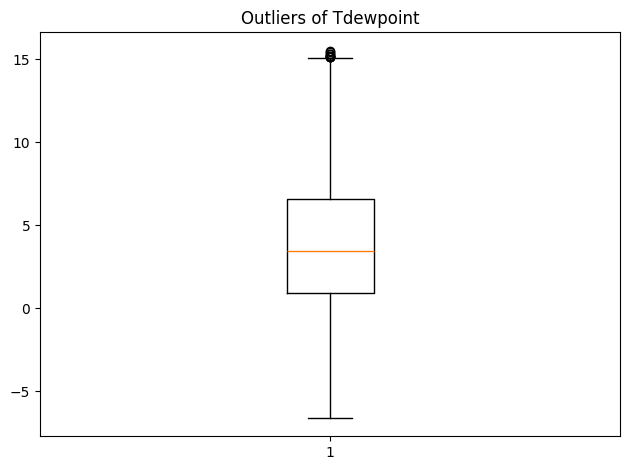

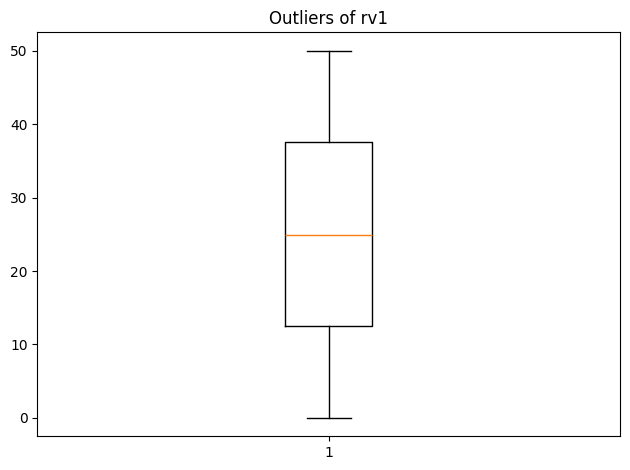

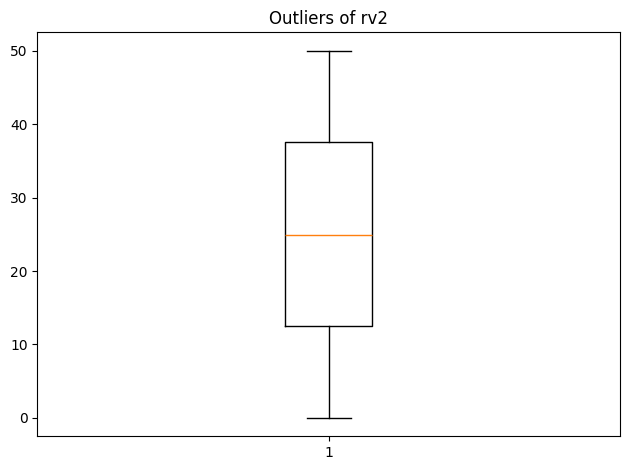

In [8]:
for label in df.columns[:]:
    plt.boxplot(df[label])
    plt.title(f"Outliers of {label}")
    plt.tight_layout()
    plt.show()

### __Distribution of Each Columns__
#### Some of the columns are having "capped" distribution, and some columns such as Appliance, T_Kitchen, etc, have a massive outliers. So normalization and outlier removing is needed

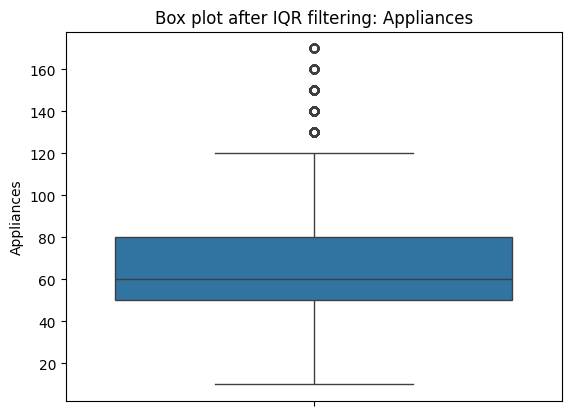

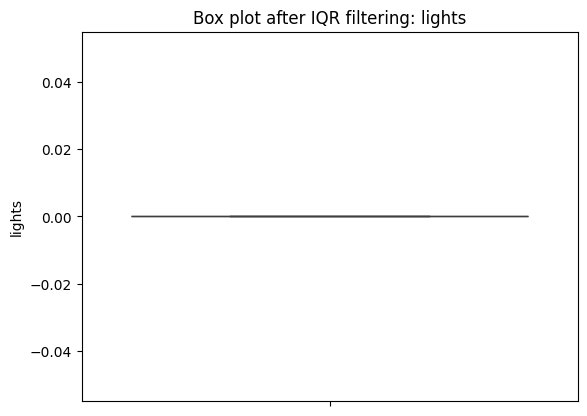

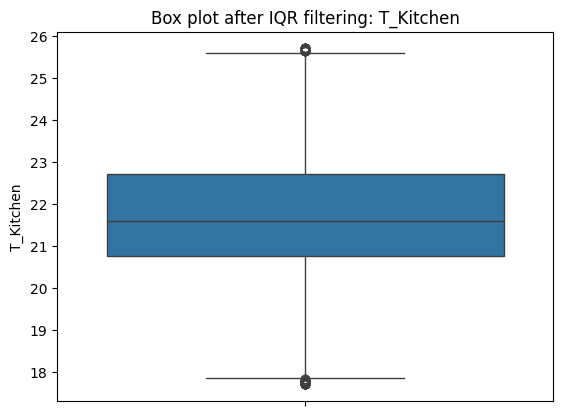

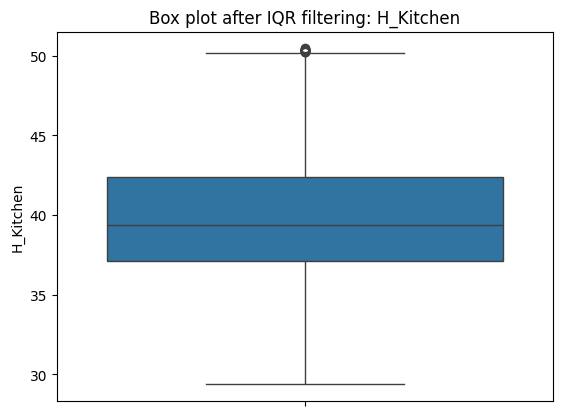

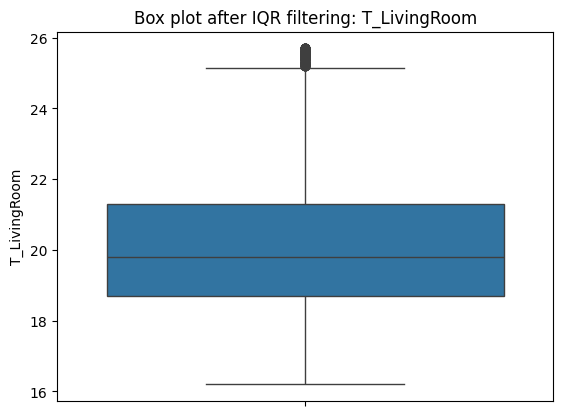

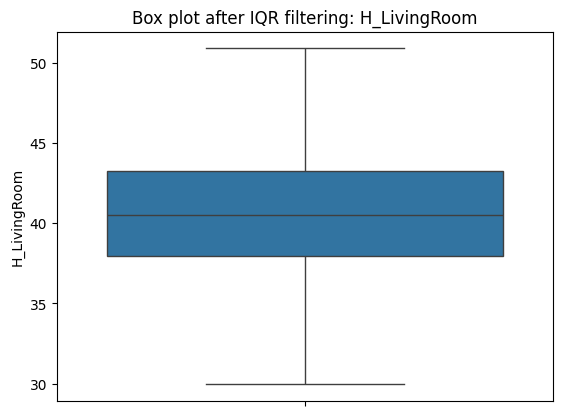

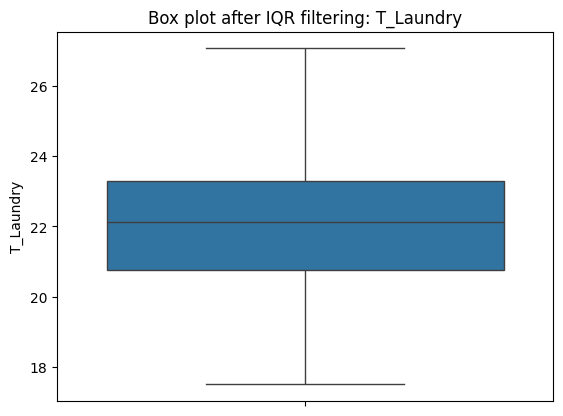

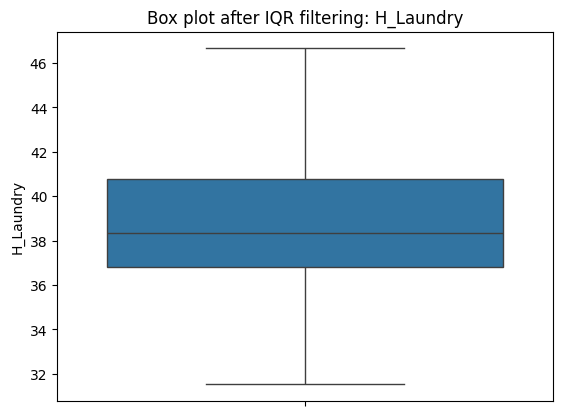

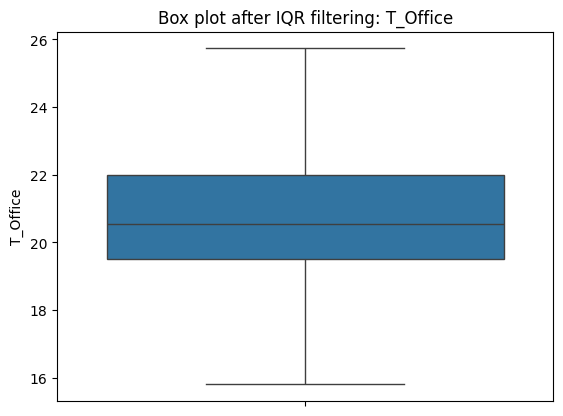

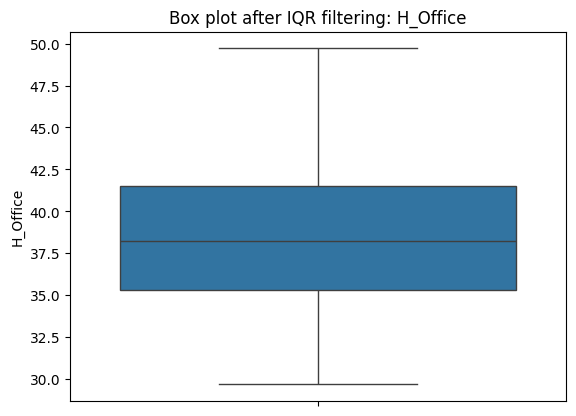

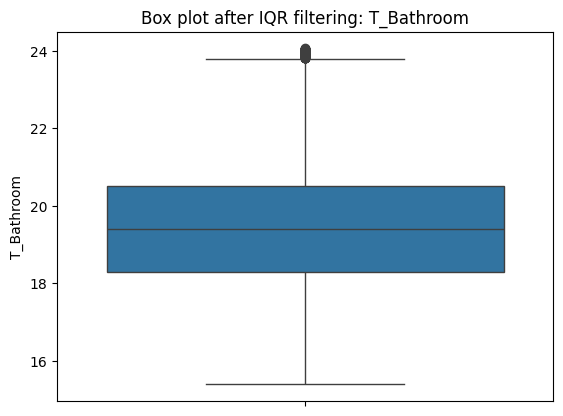

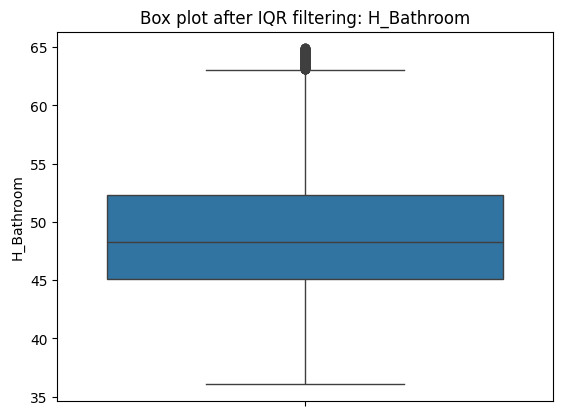

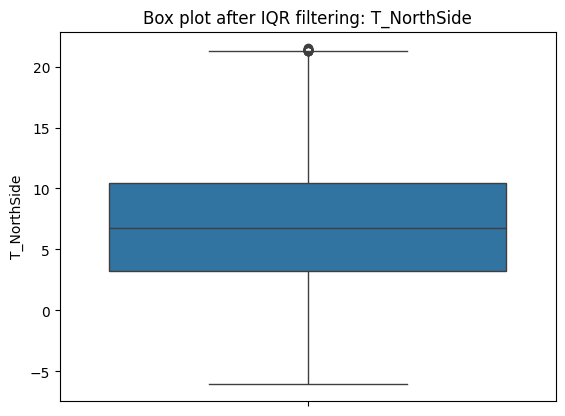

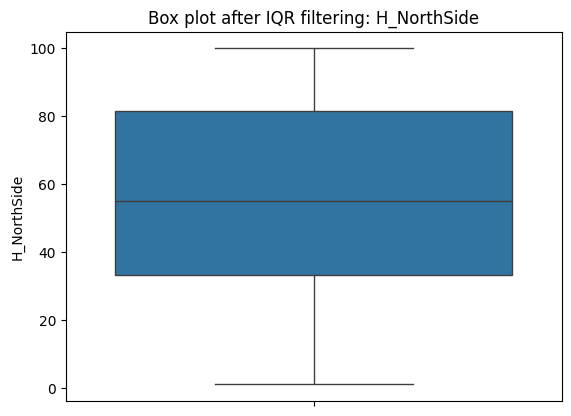

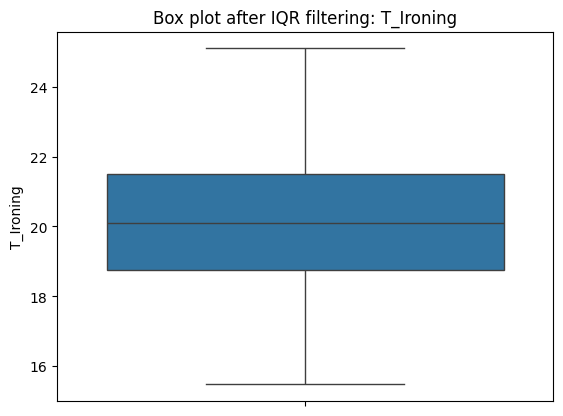

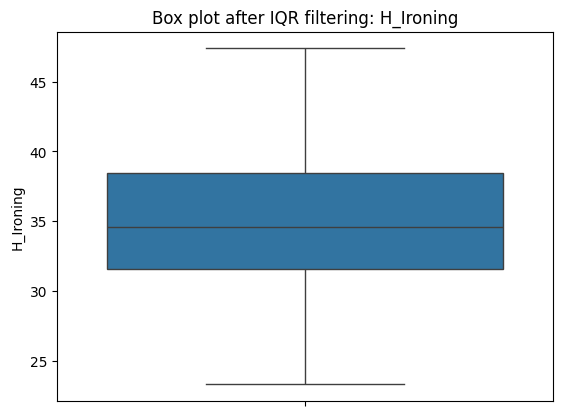

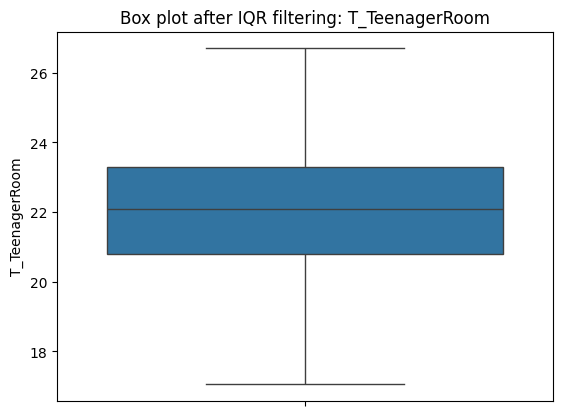

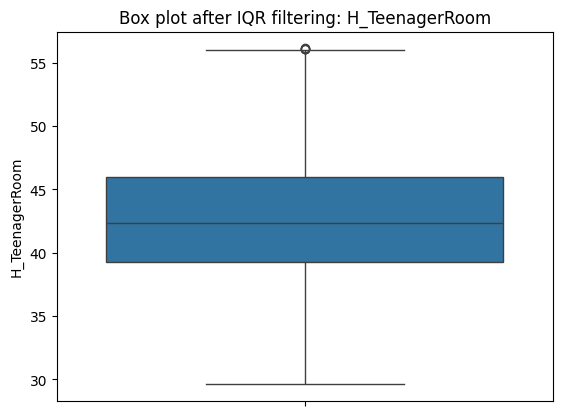

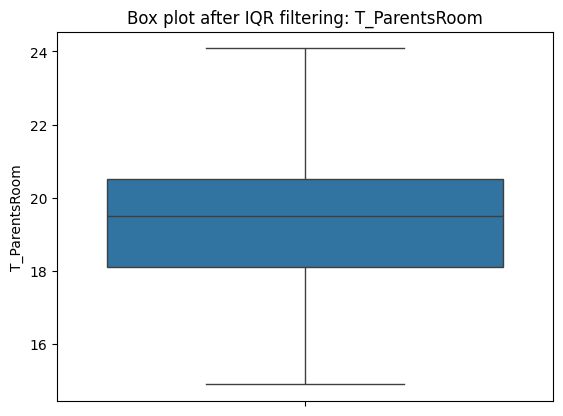

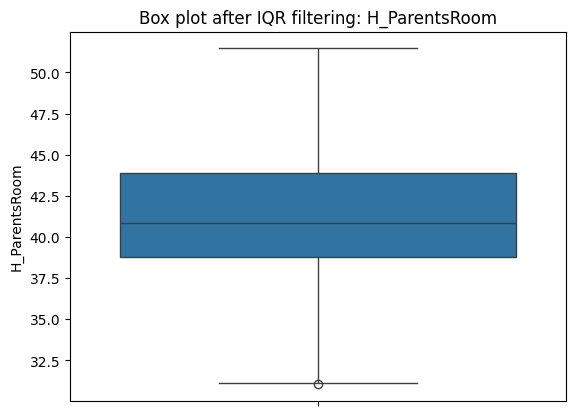

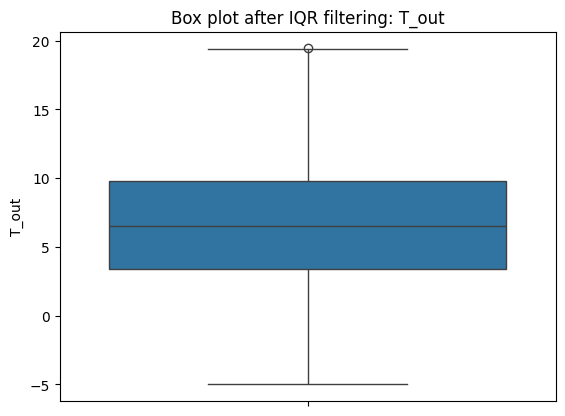

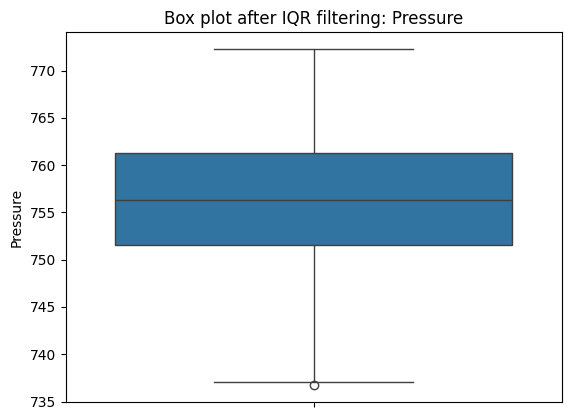

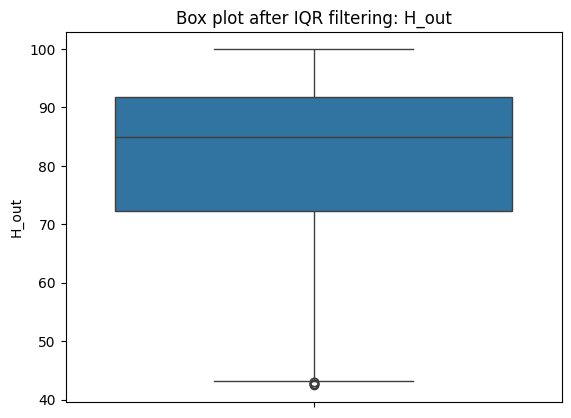

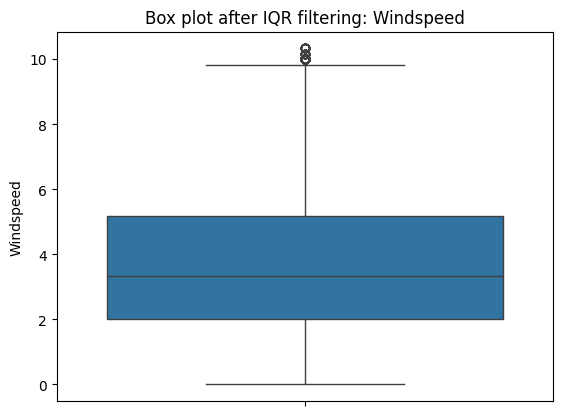

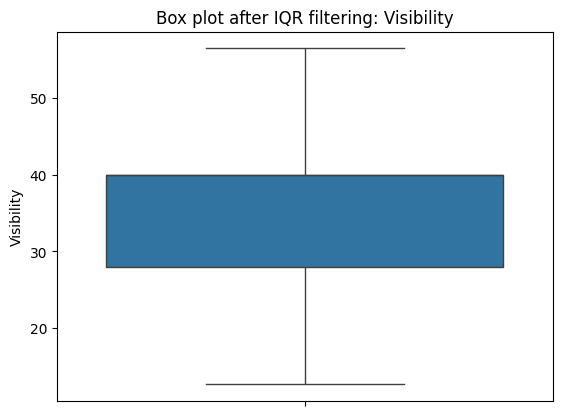

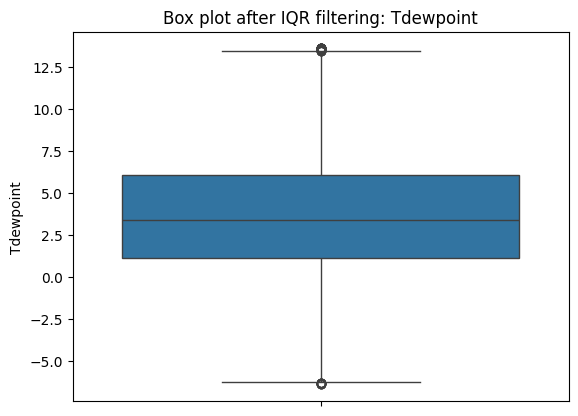

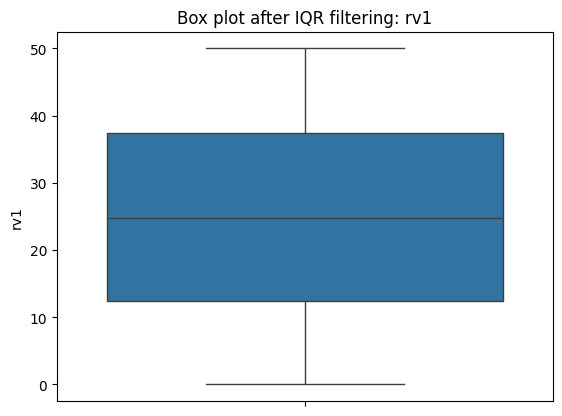

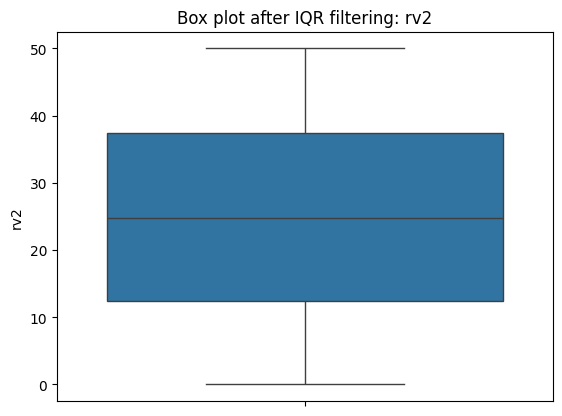

In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[
        (df[column] >= Q1 - 1.5 * IQR) & 
        (df[column] <= Q3 + 1.5 * IQR)
        ]
    sns.boxplot(filtered_df[column])
    plt.title(f"Box plot after IQR filtering: {column}")
    plt.show()
    return filtered_df

numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    df = remove_outliers(df, col)

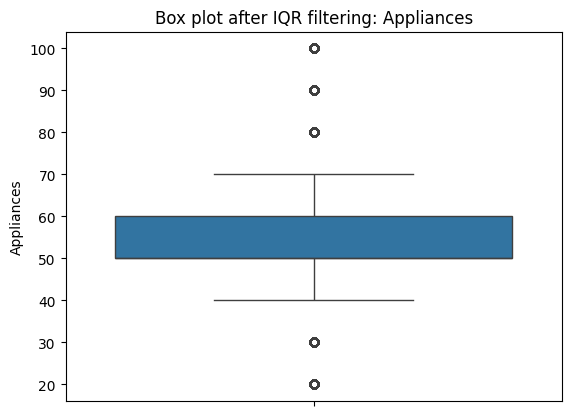

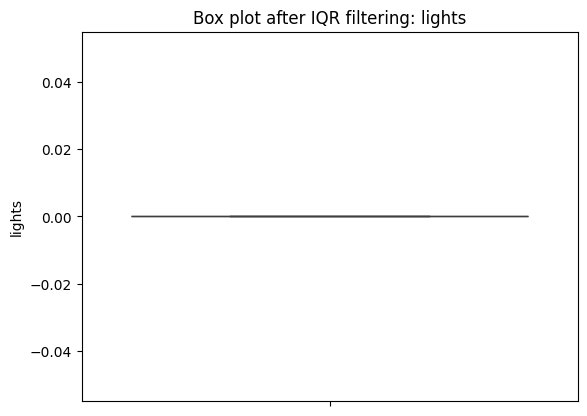

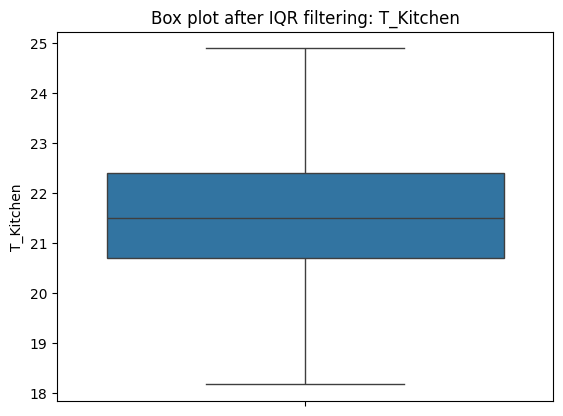

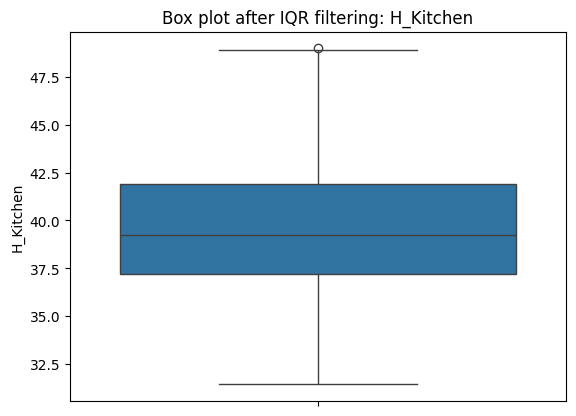

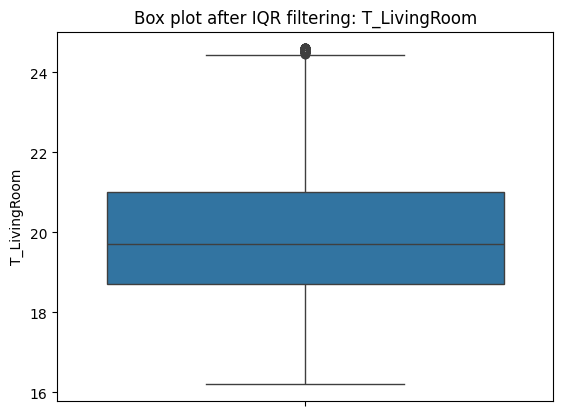

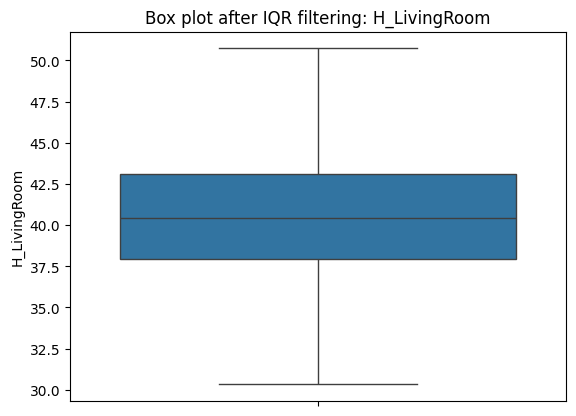

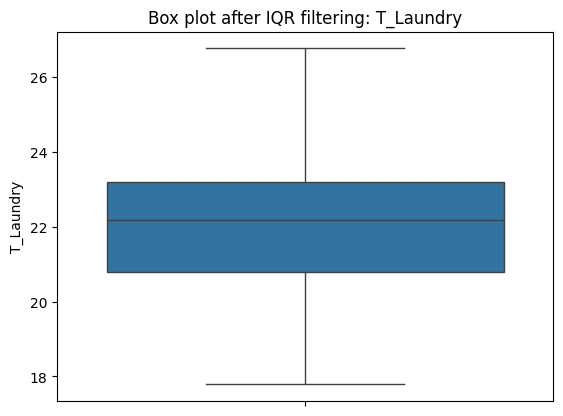

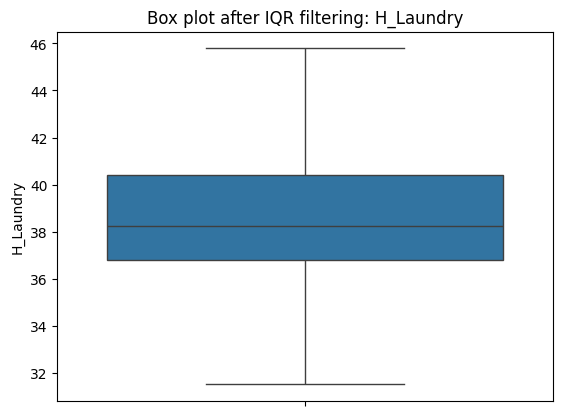

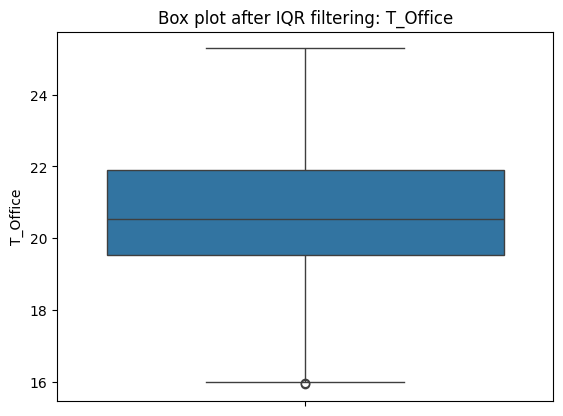

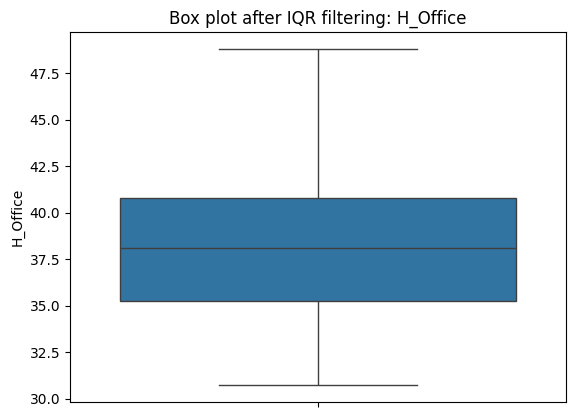

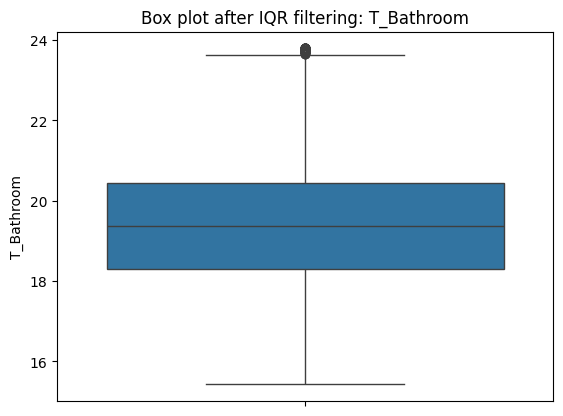

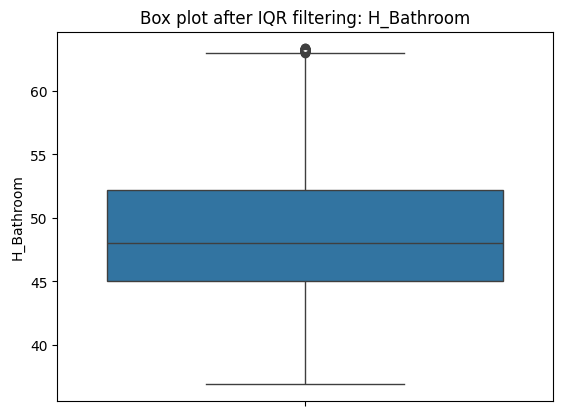

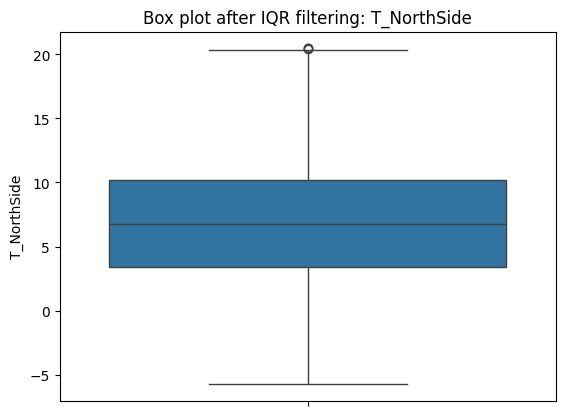

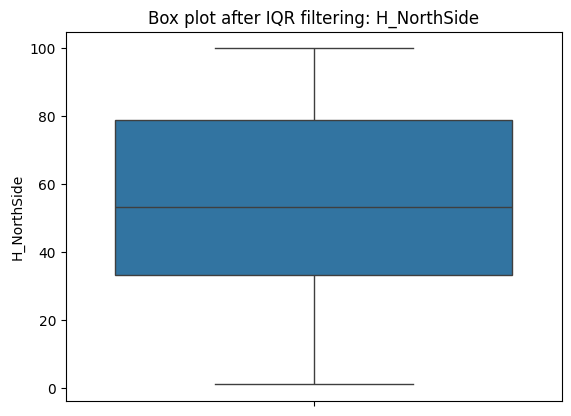

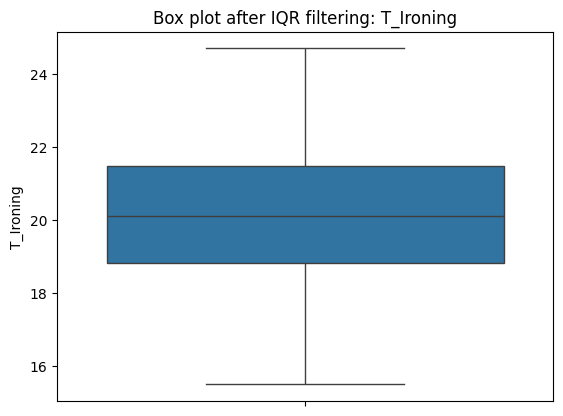

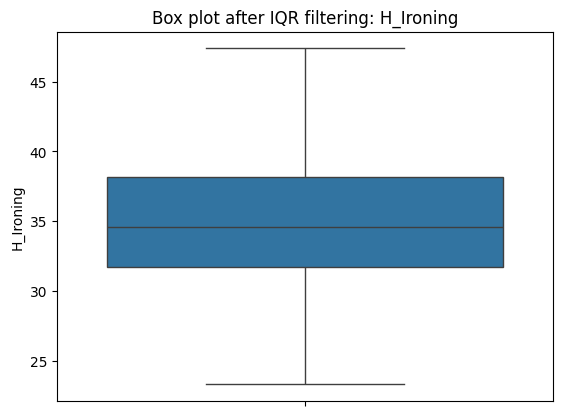

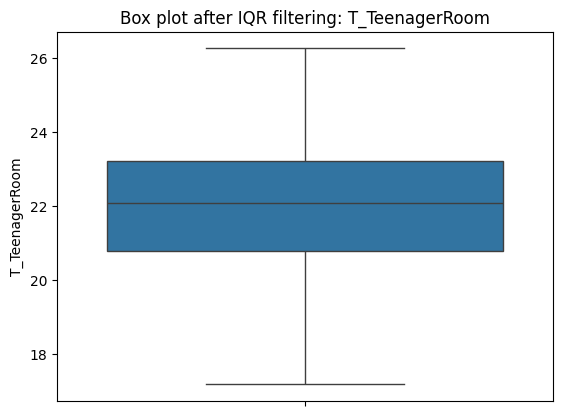

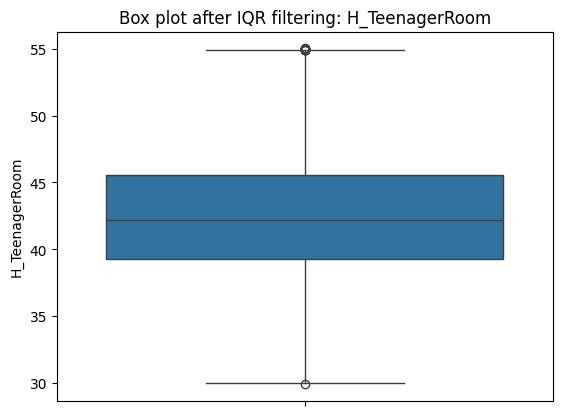

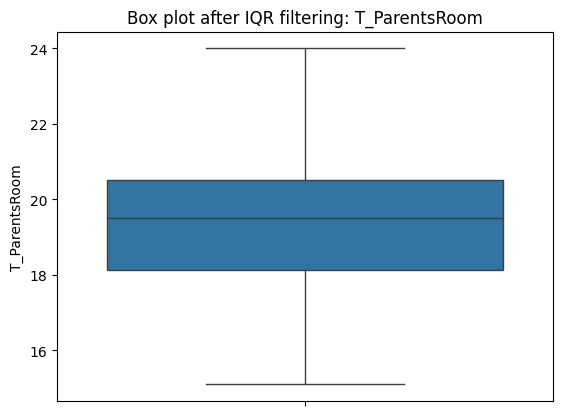

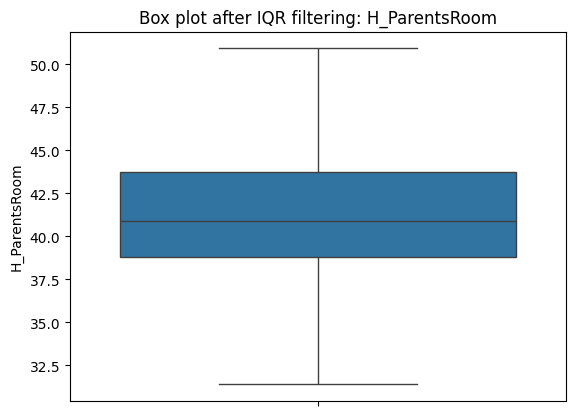

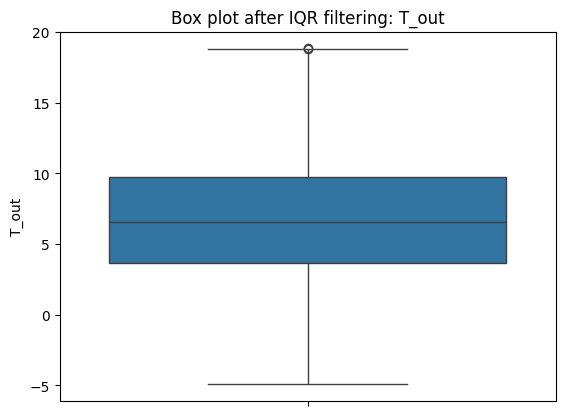

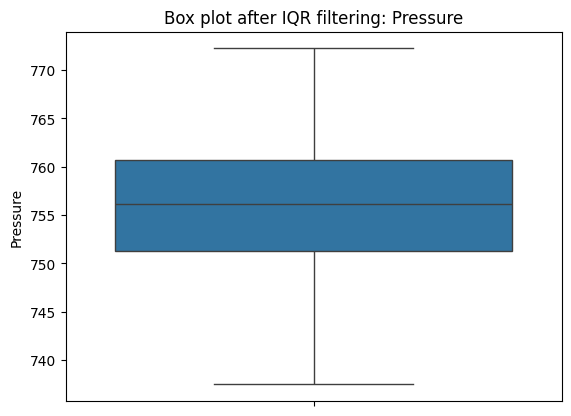

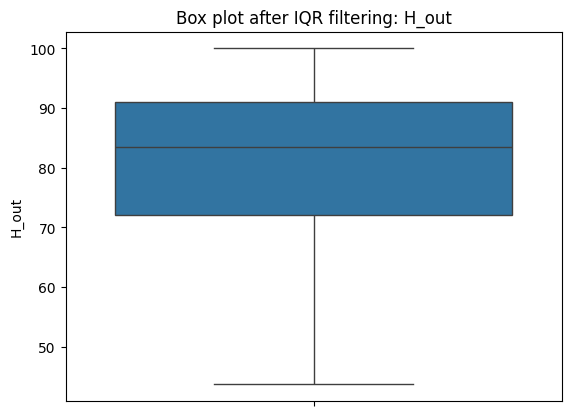

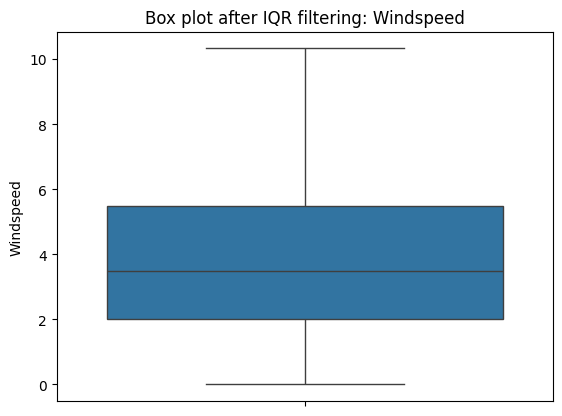

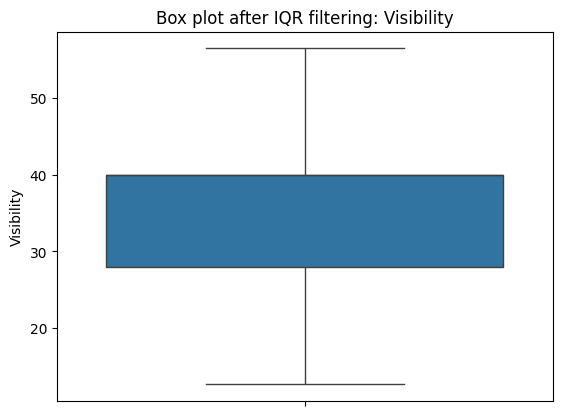

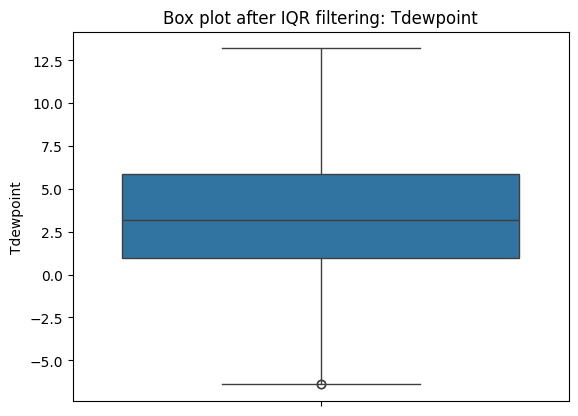

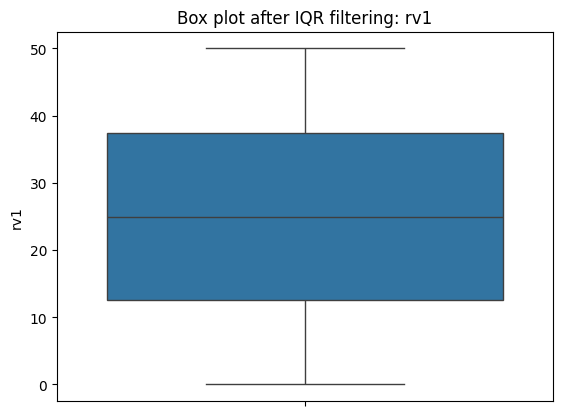

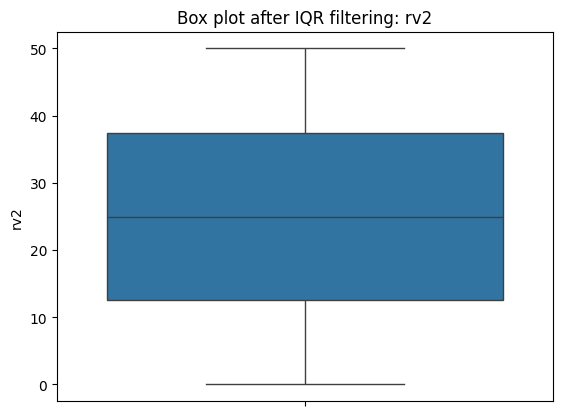

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[
        (df[column] >= Q1 - 1.5 * IQR) & 
        (df[column] <= Q3 + 1.5 * IQR)
        ]
    sns.boxplot(filtered_df[column])
    plt.title(f"Box plot after IQR filtering: {column}")
    plt.show()
    return filtered_df

numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    df = remove_outliers(df, col)

In [11]:
target = 'Appliances'
X = [col for col in df.columns if col not in target]
pt = PowerTransformer(method='yeo-johnson')
df[X] = pt.fit_transform(df[X])

In [12]:
df_corr = df.corr(method="pearson")[target].drop(target).sort_values()

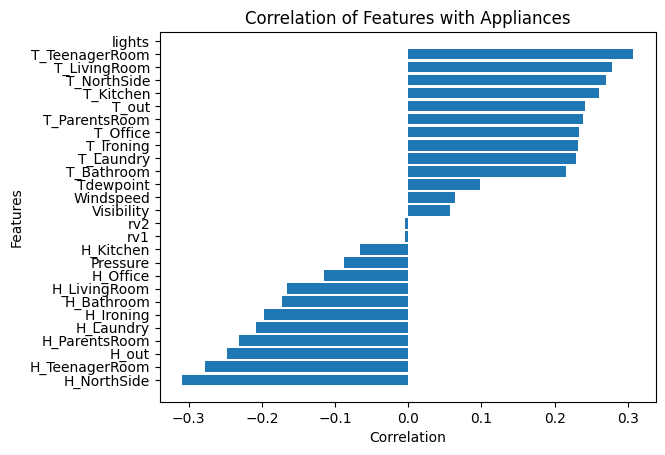

In [13]:
plt.figure()
plt.barh(df_corr.index, df_corr.values)
plt.title("Correlation of Features with Appliances")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

In [14]:
final_X = df[['lights', 'T_TeenagerRoom', 'T_LivingRoom', 'T_NorthSide', 'T_Kitchen', 'T_out', 'T_Office', 'T_Ironing', 'T_ParentsRoom', 'T_Laundry']]
final_y = df['Appliances']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(final_X,final_y, test_size=0.2, random_state=42)

### Creating Baseline for The Model

In [16]:
y_pred_mean = np.full(
    shape=len(y_test),
    fill_value=y_train.mean()
)

In [17]:
mae_mean = mean_absolute_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))
r2_mean = r2_score(y_test, y_pred_mean)

print('Baseline: Mean Predictor')
print(f'MAE: {mae_mean:.2f}')
print(f'RMSE: {rmse_mean:.2f}')
print(f'R2: {r2_mean:.4f}')

Baseline: Mean Predictor
MAE: 14.44
RMSE: 18.51
R2: -0.0016


In [18]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("\nBaseline: DummyRegressor (mean)")
print("MAE :", mean_absolute_error(y_test, y_pred_dummy))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dummy)))
print("R²  :", r2_score(y_test, y_pred_dummy))


Baseline: DummyRegressor (mean)
MAE : 14.441892153531988
RMSE: 18.510897312974986
R²  : -0.0015936104434286502


### Modeling

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
print(f'Coefficient: {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')

Coefficient: 0.00
Intercept: 56.65


In [22]:
y_pred = model.predict(X_test)
print(f'Predicted values for X_test: {y_pred}')

Predicted values for X_test: [57.93340631 54.09553652 58.1154541  ... 46.68935211 64.73156162
 62.8000922 ]


In [23]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 12.90
RMSE: 3.59


### __Baseline Vs Model__

The baseline evaluation (MAE and RMSE) is:
+ MAE: 18.51
+ RMSE: 24.96

And the model evaluation (MAE and RMSE) is:
+ MAE: 16.71
+ RMSE: 4.09

This means, my simple model could overcome the baseline really well. This is my goal in this practice (Without AI).

In [33]:
print("X_test type :", type(X_test))
print("y_test type :", type(y_test))
print("y_pred type :", type(y_pred))

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


X_test type : <class 'pandas.core.frame.DataFrame'>
y_test type : <class 'pandas.core.series.Series'>
y_pred type : <class 'numpy.ndarray'>
X_test shape: (1755, 10)
y_test shape: (1755,)
y_pred shape: (1755,)


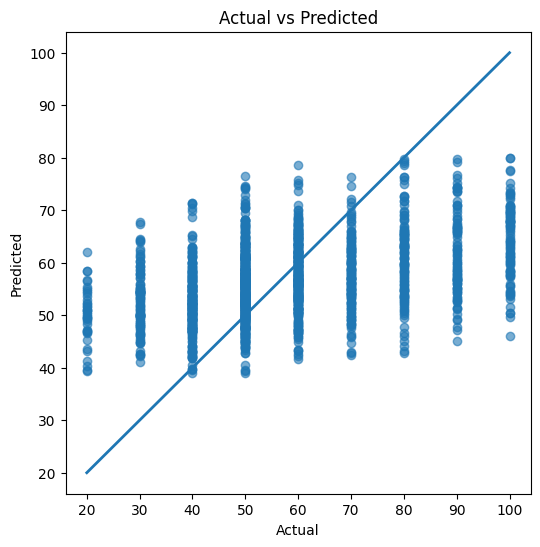

In [34]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linewidth=2
)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()